<div style="border:solid green 2px; padding: 20px">
<b>Привет, Владислав!</b>

Меня зовут Александр Пономаренко, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать data science. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b>
    Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Содержание
- Содержание
- Постановка задачи
- Выгрузка данных
- Анализ данных
- Подготовка данных
- Построение нейронной сети
- Улучшение сети
- Выводы

# Постановка задачи

На основе данных характеристик 240 звезд нужно построить нейронную сеть, которая будет предсказывать температуру на поверхности новых звезд.
<br/><br/>
Количественные показатели:
- Относительная светимость (L/Lo) - относительно Солнца
- Относительный радиус (R/Ro) - относительно Солнца
- Абсолютная звездная величина (Mv) - физическая величина
<br/><br/>

Качественные показатели:
- Звездный цвет - ('white', 'red', 'blue', 'yellow', 'yellow-orange', etc)
- Тип звезды - (0, 1, 2, 3, 4, 5)
  - 0 - Коричневый карлик
  - 1 - Красный карлик
  - 2 - Белый карлик
  - 3 - Звезды главной последовательности
  - 4 - Сверхгигант
  - 5 - Гипергигант
<br/><br/>

Количественный результат:
- Абсолютная температура (T(K)) - температура на поверхности звезды в Кельвинах
<br/><br/>

Предварительный анализ:
- Результат количественный - на выходе можно ожидать алгоритм регрессии
- Функция потерь - MSE / MAE
- С количеством скрытых слоев придется экспериментировать
  - Много показателей (измерений), скорее всего 3-5 скрытых слоев будет лучше работать

# Выгрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import os
import random
import time
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)

In [3]:
LOCAL_PATH = './datasets/6_class.csv'
WEB_PATH = '/datasets/6_class.csv'

RANDOM_STATE = 2023

In [4]:
if os.path.exists(LOCAL_PATH):
    df = pd.read_csv(LOCAL_PATH, index_col=0)
elif os.path.exists(WEB_PATH):
    df = pd.read_csv(WEB_PATH, index_col=0)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, хорошо, данные на месте:)  Можно как вариант еще написать условие когда не нашел ни один путь:

```python
    
if os.path.exists(LOCAL_PATH):
    df = pd.read_csv(LOCAL_PATH, index_col=0)
elif os.path.exists(WEB_PATH):
    df = pd.read_csv(WEB_PATH, index_col=0)   
else:
    print('something')
```

</div>

# Анализ данных

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 13.1+ KB


в данных нет пропусков

### Пореименнуем колонки, чтобы было легче их использовать

In [6]:
df = df.rename(columns={
    'Temperature (K)': 'temp',
    'Luminosity(L/Lo)': 'lumin',
    'Radius(R/Ro)': 'radius',
    'Absolute magnitude(Mv)': 'magnitude',
    'Star type': 'type',
    'Star color': 'color'
})

In [7]:
df.columns

Index(['temp', 'lumin', 'radius', 'magnitude', 'type', 'color'], dtype='object')

### Проверим категориальные данные

In [8]:
pd.value_counts(df.type)

0    40
1    40
2    40
3    40
4    40
5    40
Name: type, dtype: int64

данные распределенны нормально

In [9]:
pd.value_counts(df.color)

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
yellowish               2
Orange                  2
Yellowish               1
Blue                    1
White-Yellow            1
Orange-Red              1
Blue-White              1
Pale yellow orange      1
Blue white              1
Name: color, dtype: int64

нужно будет устранить неявные ошибки

### Проверка количественных данных

<AxesSubplot:>

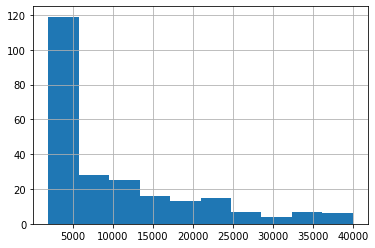

In [10]:
df.temp.hist()

Данные выглядят хорошо, нет выбросов (target feature)

<AxesSubplot:>

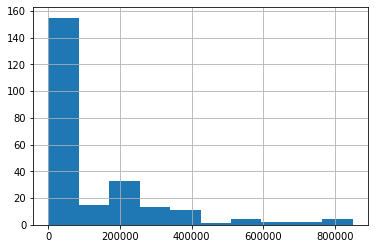

In [11]:
df.lumin.hist()

Данные выглядят хорошо, нет выбросов

<AxesSubplot:>

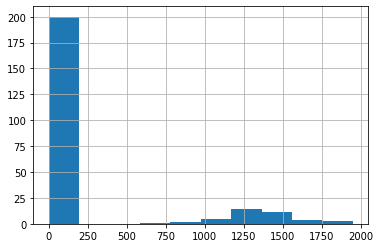

In [12]:
df.radius.hist()

Есть разрыв между данными, но это не похоже на выброс

<AxesSubplot:>

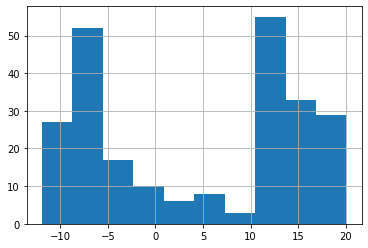

In [13]:
df.magnitude.hist()

Данные разбросанные, но это не похоже на выброс

# Подготовка данных

In [14]:
pd.value_counts(df.color)

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
yellowish               2
Orange                  2
Yellowish               1
Blue                    1
White-Yellow            1
Orange-Red              1
Blue-White              1
Pale yellow orange      1
Blue white              1
Name: color, dtype: int64

In [15]:
df.color = df.color.replace({
    'Blue-white': 'Blue White',
    'Blue white': 'Blue White',
    'Blue white ': 'Blue White',
    'Blue-White': 'Blue White',
    'yellow-white': 'Yellow',
    'Yellowish White': 'Yellow',
    'White-Yellow': 'Yellow',
    'yellowish': 'Yellow',
    'Yellowish': 'Yellow',
    'Yellow White': 'Yellow',
    'white': 'White',
    'whitish': 'White',
    'Whitish': 'White',
    'Pale yellow orange': 'Orange',
    'Blue ': 'Blue',
    'Orange-Red': 'Orange'
})

In [16]:
pd.value_counts(df.color)

Red           112
Blue           56
Blue White     41
Yellow         15
White          12
Orange          4
Name: color, dtype: int64

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, хорошо:)
</div>

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('temp', axis=1), df.temp, test_size=0.1, random_state=RANDOM_STATE)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> В тест лучше больше данных отдать, например, 20%
</div>

In [18]:
X_train_num = X_train.drop(['color', 'type'], axis=1)
X_test_num = X_test.drop(['color', 'type'], axis=1)

In [19]:
columns_num = X_train_num.columns

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(X_train_num)

StandardScaler()

In [22]:
X_train_num = scaler.transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

In [23]:
X_train_num = pd.DataFrame(X_train_num, columns=columns_num)
X_test_num = pd.DataFrame(X_test_num, columns=columns_num)

In [24]:
X_train_cat = X_train[['color', 'type']]
X_test_cat = X_test[['color', 'type']]

In [25]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [26]:
ohe.fit(X_train_cat)

OneHotEncoder(handle_unknown='ignore')

In [27]:
X_train_cat = ohe.transform(X_train_cat).toarray()
X_test_cat = ohe.transform(X_test_cat).toarray()

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 
    
название столбцов можно получить еще с помощью `get_feature_names/get_feature_names_out`
</div>

In [28]:
#КОД РЕВЬЮЕРА
ohe.get_feature_names()

array(['x0_Blue', 'x0_Blue White', 'x0_Orange', 'x0_Red', 'x0_White',
       'x0_Yellow', 'x1_0', 'x1_1', 'x1_2', 'x1_3', 'x1_4', 'x1_5'],
      dtype=object)

In [29]:
columns_cat = ohe.categories_[0].tolist()
columns_cat.extend(ohe.categories_[1].tolist())

In [30]:
columns_cat

['Blue', 'Blue White', 'Orange', 'Red', 'White', 'Yellow', 0, 1, 2, 3, 4, 5]

In [31]:
X_train_cat = pd.DataFrame(data=X_train_cat, columns=columns_cat)
X_test_cat = pd.DataFrame(data=X_test_cat, columns=columns_cat)

In [32]:
X_train = X_train_num.join(X_train_cat)
X_test = X_test_num.join(X_test_cat)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Данные подготовил корректно
    
    
Чтобы упростить себе задачу, можно воспользоваться ColumnTransformer
    
    
```python
    from sklearn.compose import ColumnTransformer
    numeric = <your code>
    categorical = <your code>
    col_transformer = ColumnTransformer(
                            transformers=[
                                ('scaler', StandardScaler(), numeric),
                                ('ohe', OneHotEncoder(sparse=False, drop='first'), categorical)],
                                remainder='passthrough')

    X_train = col_transformer.fit_transform(X_train)
    X_test = col_transformer.transform(X_test)
```
+  https://towardsdatascience.com/using-columntransformer-to-combine-data-processing-steps-af383f7d5260
+  https://medium.com/analytics-vidhya/handling-heterogeneous-features-in-a-dataset-using-columntransformer-aa525ebe0486 
    

</div>

In [33]:
X_train_t = torch.FloatTensor(X_train.values)
X_test_t = torch.FloatTensor(X_test.values)
y_train_t = torch.FloatTensor(y_train.values)
y_test_t = torch.FloatTensor(y_test.values)

# Построение нейронной сети
- линейная сеть
- линейная сеть с 5 слоями
- линейная сеть с функцией активации

In [34]:
learning_rate = 0.001

In [35]:
class NetSimpleSingle(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons, n_out_neurons):
        super(NetSimpleSingle, self).__init__()
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons)
        self.fc2 = nn.Linear(n_hidden_neurons, n_out_neurons)
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [36]:
net_simple_single = NetSimpleSingle(15, 15, 1)
optimizer = torch.optim.Adam(net_simple_single.parameters(), lr=learning_rate)
n_epochs = 30000
loss = nn.MSELoss()

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Для начала хорошо
</div>

In [37]:
net_simple_single_mse_train = []
net_simple_single_mse_test = []

In [37]:
for epoch in range(n_epochs):
    optimizer.zero_grad()
    z_train_t = net_simple_single.forward(X_train_t).flatten()
    mse_value_train = loss(z_train_t, y_train_t)
    mse_value_train.backward()
    optimizer.step()

    if epoch % 10 == 0 or epoch == n_epochs - 1:
        net_simple_single.eval()
        z_test_t = net_simple_single.forward(X_test_t).flatten()
        mse_value_test = loss(z_test_t, y_test_t)

        net_simple_single_mse_train.append(mse_value_train.item())
        net_simple_single_mse_test.append(mse_value_test.item())

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Смотри, очень не хватает визуализации обучения. Вот смотри:

</div>

In [39]:
from sklearn.metrics import mean_squared_error
for epoch in range(n_epochs):
    optimizer.zero_grad()
    z_train_t = net_simple_single.forward(X_train_t).flatten()
    mse_value_train = loss(z_train_t, y_train_t)
    mse_value_train.backward()
    optimizer.step()

    if epoch % 10 == 0 or epoch == n_epochs - 1:
        with torch.no_grad(): # еще можно отключить вычисления градиентов это ускорит обучение 
            net_simple_single.eval()
            z_test_t = net_simple_single.forward(X_test_t).flatten()
#             mse_value_test = loss(z_test_t, y_test_t)  
            mse_value_test = mean_squared_error(z_test_t, y_test_t, squared=False)# воспользуемся готовой функцией для подсчета RMSE
            print(f"Epoch: {epoch}, RMSE test: {mse_value_test}")

            net_simple_single_mse_train.append(mse_value_train.item())
            net_simple_single_mse_test.append(mse_value_test.item())

Epoch: 0, RMSE test: 13294.314453125
Epoch: 10, RMSE test: 13294.25390625
Epoch: 20, RMSE test: 13294.1943359375
Epoch: 30, RMSE test: 13294.1328125
Epoch: 40, RMSE test: 13294.06640625
Epoch: 50, RMSE test: 13293.9931640625
Epoch: 60, RMSE test: 13293.9111328125
Epoch: 70, RMSE test: 13293.818359375
Epoch: 80, RMSE test: 13293.7138671875
Epoch: 90, RMSE test: 13293.5966796875
Epoch: 100, RMSE test: 13293.4658203125
Epoch: 110, RMSE test: 13293.3203125
Epoch: 120, RMSE test: 13293.1591796875
Epoch: 130, RMSE test: 13292.9814453125
Epoch: 140, RMSE test: 13292.787109375
Epoch: 150, RMSE test: 13292.576171875
Epoch: 160, RMSE test: 13292.3486328125
Epoch: 170, RMSE test: 13292.1025390625
Epoch: 180, RMSE test: 13291.8388671875
Epoch: 190, RMSE test: 13291.55859375
Epoch: 200, RMSE test: 13291.259765625
Epoch: 210, RMSE test: 13290.943359375
Epoch: 220, RMSE test: 13290.609375
Epoch: 230, RMSE test: 13290.2578125
Epoch: 240, RMSE test: 13289.888671875
Epoch: 250, RMSE test: 13289.50097656

Epoch: 2120, RMSE test: 12973.83203125
Epoch: 2130, RMSE test: 12971.1103515625
Epoch: 2140, RMSE test: 12968.3798828125
Epoch: 2150, RMSE test: 12965.640625
Epoch: 2160, RMSE test: 12962.8916015625
Epoch: 2170, RMSE test: 12960.1337890625
Epoch: 2180, RMSE test: 12957.3671875
Epoch: 2190, RMSE test: 12954.5908203125
Epoch: 2200, RMSE test: 12951.806640625
Epoch: 2210, RMSE test: 12949.0126953125
Epoch: 2220, RMSE test: 12946.208984375
Epoch: 2230, RMSE test: 12943.3974609375
Epoch: 2240, RMSE test: 12940.5771484375
Epoch: 2250, RMSE test: 12937.7470703125
Epoch: 2260, RMSE test: 12934.908203125
Epoch: 2270, RMSE test: 12932.060546875
Epoch: 2280, RMSE test: 12929.205078125
Epoch: 2290, RMSE test: 12926.3388671875
Epoch: 2300, RMSE test: 12923.46484375
Epoch: 2310, RMSE test: 12920.5810546875
Epoch: 2320, RMSE test: 12917.689453125
Epoch: 2330, RMSE test: 12914.7890625
Epoch: 2340, RMSE test: 12911.87890625
Epoch: 2350, RMSE test: 12908.9609375
Epoch: 2360, RMSE test: 12906.0341796875


Epoch: 4190, RMSE test: 12215.705078125
Epoch: 4200, RMSE test: 12211.0908203125
Epoch: 4210, RMSE test: 12206.46875
Epoch: 4220, RMSE test: 12201.83984375
Epoch: 4230, RMSE test: 12197.2041015625
Epoch: 4240, RMSE test: 12192.5595703125
Epoch: 4250, RMSE test: 12187.91015625
Epoch: 4260, RMSE test: 12183.2529296875
Epoch: 4270, RMSE test: 12178.5888671875
Epoch: 4280, RMSE test: 12173.91796875
Epoch: 4290, RMSE test: 12169.2392578125
Epoch: 4300, RMSE test: 12164.5546875
Epoch: 4310, RMSE test: 12159.86328125
Epoch: 4320, RMSE test: 12155.1640625
Epoch: 4330, RMSE test: 12150.458984375
Epoch: 4340, RMSE test: 12145.748046875
Epoch: 4350, RMSE test: 12141.029296875
Epoch: 4360, RMSE test: 12136.3037109375
Epoch: 4370, RMSE test: 12131.5712890625
Epoch: 4380, RMSE test: 12126.8330078125
Epoch: 4390, RMSE test: 12122.087890625
Epoch: 4400, RMSE test: 12117.3359375
Epoch: 4410, RMSE test: 12112.578125
Epoch: 4420, RMSE test: 12107.8134765625
Epoch: 4430, RMSE test: 12103.0419921875
Epoch:

Epoch: 6280, RMSE test: 11127.322265625
Epoch: 6290, RMSE test: 11121.6298828125
Epoch: 6300, RMSE test: 11115.9326171875
Epoch: 6310, RMSE test: 11110.232421875
Epoch: 6320, RMSE test: 11104.529296875
Epoch: 6330, RMSE test: 11098.822265625
Epoch: 6340, RMSE test: 11093.111328125
Epoch: 6350, RMSE test: 11087.396484375
Epoch: 6360, RMSE test: 11081.6796875
Epoch: 6370, RMSE test: 11075.9580078125
Epoch: 6380, RMSE test: 11070.232421875
Epoch: 6390, RMSE test: 11064.5048828125
Epoch: 6400, RMSE test: 11058.7724609375
Epoch: 6410, RMSE test: 11053.037109375
Epoch: 6420, RMSE test: 11047.298828125
Epoch: 6430, RMSE test: 11041.556640625
Epoch: 6440, RMSE test: 11035.810546875
Epoch: 6450, RMSE test: 11030.0615234375
Epoch: 6460, RMSE test: 11024.30859375
Epoch: 6470, RMSE test: 11018.552734375
Epoch: 6480, RMSE test: 11012.7939453125
Epoch: 6490, RMSE test: 11007.0322265625
Epoch: 6500, RMSE test: 11001.2646484375
Epoch: 6510, RMSE test: 10995.49609375
Epoch: 6520, RMSE test: 10989.72363

Epoch: 8380, RMSE test: 9873.90234375
Epoch: 8390, RMSE test: 9867.75390625
Epoch: 8400, RMSE test: 9861.60546875
Epoch: 8410, RMSE test: 9855.4541015625
Epoch: 8420, RMSE test: 9849.3037109375
Epoch: 8430, RMSE test: 9843.15234375
Epoch: 8440, RMSE test: 9836.9990234375
Epoch: 8450, RMSE test: 9830.8447265625
Epoch: 8460, RMSE test: 9824.6904296875
Epoch: 8470, RMSE test: 9818.53515625
Epoch: 8480, RMSE test: 9812.37890625
Epoch: 8490, RMSE test: 9806.220703125
Epoch: 8500, RMSE test: 9800.0625
Epoch: 8510, RMSE test: 9793.9033203125
Epoch: 8520, RMSE test: 9787.7431640625
Epoch: 8530, RMSE test: 9781.5810546875
Epoch: 8540, RMSE test: 9775.4189453125
Epoch: 8550, RMSE test: 9769.2578125
Epoch: 8560, RMSE test: 9763.09375
Epoch: 8570, RMSE test: 9756.9296875
Epoch: 8580, RMSE test: 9750.763671875
Epoch: 8590, RMSE test: 9744.59765625
Epoch: 8600, RMSE test: 9738.4306640625
Epoch: 8610, RMSE test: 9732.2626953125
Epoch: 8620, RMSE test: 9726.09375
Epoch: 8630, RMSE test: 9719.923828125

Epoch: 10500, RMSE test: 8559.5703125
Epoch: 10510, RMSE test: 8553.408203125
Epoch: 10520, RMSE test: 8547.2470703125
Epoch: 10530, RMSE test: 8541.087890625
Epoch: 10540, RMSE test: 8534.9296875
Epoch: 10550, RMSE test: 8528.7744140625
Epoch: 10560, RMSE test: 8522.6201171875
Epoch: 10570, RMSE test: 8516.4677734375
Epoch: 10580, RMSE test: 8510.3154296875
Epoch: 10590, RMSE test: 8504.166015625
Epoch: 10600, RMSE test: 8498.017578125
Epoch: 10610, RMSE test: 8491.87109375
Epoch: 10620, RMSE test: 8485.7265625
Epoch: 10630, RMSE test: 8479.5830078125
Epoch: 10640, RMSE test: 8473.44140625
Epoch: 10650, RMSE test: 8467.3017578125
Epoch: 10660, RMSE test: 8461.1630859375
Epoch: 10670, RMSE test: 8455.0283203125
Epoch: 10680, RMSE test: 8448.8935546875
Epoch: 10690, RMSE test: 8442.759765625
Epoch: 10700, RMSE test: 8436.62890625
Epoch: 10710, RMSE test: 8430.4990234375
Epoch: 10720, RMSE test: 8424.3720703125
Epoch: 10730, RMSE test: 8418.24609375
Epoch: 10740, RMSE test: 8412.12304687

Epoch: 12580, RMSE test: 7327.52392578125
Epoch: 12590, RMSE test: 7321.880859375
Epoch: 12600, RMSE test: 7316.24072265625
Epoch: 12610, RMSE test: 7310.6025390625
Epoch: 12620, RMSE test: 7304.96728515625
Epoch: 12630, RMSE test: 7299.33544921875
Epoch: 12640, RMSE test: 7293.705078125
Epoch: 12650, RMSE test: 7288.07763671875
Epoch: 12660, RMSE test: 7282.453125
Epoch: 12670, RMSE test: 7276.8310546875
Epoch: 12680, RMSE test: 7271.2109375
Epoch: 12690, RMSE test: 7265.59375
Epoch: 12700, RMSE test: 7259.97900390625
Epoch: 12710, RMSE test: 7254.3671875
Epoch: 12720, RMSE test: 7248.75732421875
Epoch: 12730, RMSE test: 7243.150390625
Epoch: 12740, RMSE test: 7237.54541015625
Epoch: 12750, RMSE test: 7231.94384765625
Epoch: 12760, RMSE test: 7226.34423828125
Epoch: 12770, RMSE test: 7220.74755859375
Epoch: 12780, RMSE test: 7215.15283203125
Epoch: 12790, RMSE test: 7209.5615234375
Epoch: 12800, RMSE test: 7203.97216796875
Epoch: 12810, RMSE test: 7198.38525390625
Epoch: 12820, RMSE t

Epoch: 14580, RMSE test: 6260.705078125
Epoch: 14590, RMSE test: 6255.779296875
Epoch: 14600, RMSE test: 6250.859375
Epoch: 14610, RMSE test: 6245.943359375
Epoch: 14620, RMSE test: 6241.03271484375
Epoch: 14630, RMSE test: 6236.12646484375
Epoch: 14640, RMSE test: 6231.22607421875
Epoch: 14650, RMSE test: 6226.3310546875
Epoch: 14660, RMSE test: 6221.43994140625
Epoch: 14670, RMSE test: 6216.5537109375
Epoch: 14680, RMSE test: 6211.6728515625
Epoch: 14690, RMSE test: 6206.79638671875
Epoch: 14700, RMSE test: 6201.92578125
Epoch: 14710, RMSE test: 6197.06005859375
Epoch: 14720, RMSE test: 6192.19970703125
Epoch: 14730, RMSE test: 6187.34375
Epoch: 14740, RMSE test: 6182.49365234375
Epoch: 14750, RMSE test: 6177.64794921875
Epoch: 14760, RMSE test: 6172.8076171875
Epoch: 14770, RMSE test: 6167.9716796875
Epoch: 14780, RMSE test: 6163.142578125
Epoch: 14790, RMSE test: 6158.31689453125
Epoch: 14800, RMSE test: 6153.49755859375
Epoch: 14810, RMSE test: 6148.6826171875
Epoch: 14820, RMSE t

Epoch: 16600, RMSE test: 5382.25830078125
Epoch: 16610, RMSE test: 5378.58544921875
Epoch: 16620, RMSE test: 5374.92138671875
Epoch: 16630, RMSE test: 5371.2646484375
Epoch: 16640, RMSE test: 5367.61572265625
Epoch: 16650, RMSE test: 5363.9736328125
Epoch: 16660, RMSE test: 5360.33837890625
Epoch: 16670, RMSE test: 5356.7119140625
Epoch: 16680, RMSE test: 5353.0927734375
Epoch: 16690, RMSE test: 5349.48095703125
Epoch: 16700, RMSE test: 5345.8759765625
Epoch: 16710, RMSE test: 5342.279296875
Epoch: 16720, RMSE test: 5338.6904296875
Epoch: 16730, RMSE test: 5335.1083984375
Epoch: 16740, RMSE test: 5331.5341796875
Epoch: 16750, RMSE test: 5327.96826171875
Epoch: 16760, RMSE test: 5324.40869140625
Epoch: 16770, RMSE test: 5320.85693359375
Epoch: 16780, RMSE test: 5317.31298828125
Epoch: 16790, RMSE test: 5313.7763671875
Epoch: 16800, RMSE test: 5310.248046875
Epoch: 16810, RMSE test: 5306.72705078125
Epoch: 16820, RMSE test: 5303.212890625
Epoch: 16830, RMSE test: 5299.70654296875
Epoch: 

Epoch: 18650, RMSE test: 4786.5966796875
Epoch: 18660, RMSE test: 4784.39892578125
Epoch: 18670, RMSE test: 4782.20703125
Epoch: 18680, RMSE test: 4780.02001953125
Epoch: 18690, RMSE test: 4777.8388671875
Epoch: 18700, RMSE test: 4775.6630859375
Epoch: 18710, RMSE test: 4773.49267578125
Epoch: 18720, RMSE test: 4771.3271484375
Epoch: 18730, RMSE test: 4769.16748046875
Epoch: 18740, RMSE test: 4767.0126953125
Epoch: 18750, RMSE test: 4764.86328125
Epoch: 18760, RMSE test: 4762.71923828125
Epoch: 18770, RMSE test: 4760.58056640625
Epoch: 18780, RMSE test: 4758.44677734375
Epoch: 18790, RMSE test: 4756.318359375
Epoch: 18800, RMSE test: 4754.19580078125
Epoch: 18810, RMSE test: 4752.07763671875
Epoch: 18820, RMSE test: 4749.96435546875
Epoch: 18830, RMSE test: 4747.85693359375
Epoch: 18840, RMSE test: 4745.75390625
Epoch: 18850, RMSE test: 4743.65673828125
Epoch: 18860, RMSE test: 4741.564453125
Epoch: 18870, RMSE test: 4739.4765625
Epoch: 18880, RMSE test: 4737.39404296875
Epoch: 18890, 

Epoch: 20700, RMSE test: 4428.41650390625
Epoch: 20710, RMSE test: 4427.07568359375
Epoch: 20720, RMSE test: 4425.73779296875
Epoch: 20730, RMSE test: 4424.40478515625
Epoch: 20740, RMSE test: 4423.07470703125
Epoch: 20750, RMSE test: 4421.7490234375
Epoch: 20760, RMSE test: 4420.42724609375
Epoch: 20770, RMSE test: 4419.10986328125
Epoch: 20780, RMSE test: 4417.7958984375
Epoch: 20790, RMSE test: 4416.48681640625
Epoch: 20800, RMSE test: 4415.18115234375
Epoch: 20810, RMSE test: 4413.8798828125
Epoch: 20820, RMSE test: 4412.58203125
Epoch: 20830, RMSE test: 4411.2890625
Epoch: 20840, RMSE test: 4410.0
Epoch: 20850, RMSE test: 4408.7138671875
Epoch: 20860, RMSE test: 4407.43359375
Epoch: 20870, RMSE test: 4406.15625
Epoch: 20880, RMSE test: 4404.88330078125
Epoch: 20890, RMSE test: 4403.615234375
Epoch: 20900, RMSE test: 4402.35009765625
Epoch: 20910, RMSE test: 4401.08935546875
Epoch: 20920, RMSE test: 4399.83251953125
Epoch: 20930, RMSE test: 4398.57958984375
Epoch: 20940, RMSE test:

Epoch: 22740, RMSE test: 4242.5859375
Epoch: 22750, RMSE test: 4242.11083984375
Epoch: 22760, RMSE test: 4241.64013671875
Epoch: 22770, RMSE test: 4241.1728515625
Epoch: 22780, RMSE test: 4240.7099609375
Epoch: 22790, RMSE test: 4240.2509765625
Epoch: 22800, RMSE test: 4239.794921875
Epoch: 22810, RMSE test: 4239.34375
Epoch: 22820, RMSE test: 4238.89697265625
Epoch: 22830, RMSE test: 4238.453125
Epoch: 22840, RMSE test: 4238.013671875
Epoch: 22850, RMSE test: 4237.57763671875
Epoch: 22860, RMSE test: 4237.1455078125
Epoch: 22870, RMSE test: 4236.716796875
Epoch: 22880, RMSE test: 4236.29248046875
Epoch: 22890, RMSE test: 4235.87158203125
Epoch: 22900, RMSE test: 4235.45458984375
Epoch: 22910, RMSE test: 4235.0400390625
Epoch: 22920, RMSE test: 4234.630859375
Epoch: 22930, RMSE test: 4234.22509765625
Epoch: 22940, RMSE test: 4233.82275390625
Epoch: 22950, RMSE test: 4233.42431640625
Epoch: 22960, RMSE test: 4233.02978515625
Epoch: 22970, RMSE test: 4232.638671875
Epoch: 22980, RMSE tes

Epoch: 24790, RMSE test: 4215.828125
Epoch: 24800, RMSE test: 4216.01953125
Epoch: 24810, RMSE test: 4216.21484375
Epoch: 24820, RMSE test: 4216.41357421875
Epoch: 24830, RMSE test: 4216.61474609375
Epoch: 24840, RMSE test: 4216.81982421875
Epoch: 24850, RMSE test: 4217.0283203125
Epoch: 24860, RMSE test: 4217.23876953125
Epoch: 24870, RMSE test: 4217.45458984375
Epoch: 24880, RMSE test: 4217.671875
Epoch: 24890, RMSE test: 4217.8935546875
Epoch: 24900, RMSE test: 4218.1162109375
Epoch: 24910, RMSE test: 4218.34423828125
Epoch: 24920, RMSE test: 4218.57568359375
Epoch: 24930, RMSE test: 4218.81005859375
Epoch: 24940, RMSE test: 4219.04736328125
Epoch: 24950, RMSE test: 4219.28857421875
Epoch: 24960, RMSE test: 4219.53271484375
Epoch: 24970, RMSE test: 4219.78076171875
Epoch: 24980, RMSE test: 4220.03125
Epoch: 24990, RMSE test: 4220.28466796875
Epoch: 25000, RMSE test: 4220.54248046875
Epoch: 25010, RMSE test: 4220.80322265625
Epoch: 25020, RMSE test: 4221.06787109375
Epoch: 25030, RMS

Epoch: 26800, RMSE test: 4325.99462890625
Epoch: 26810, RMSE test: 4326.9189453125
Epoch: 26820, RMSE test: 4327.84619140625
Epoch: 26830, RMSE test: 4328.77734375
Epoch: 26840, RMSE test: 4329.71142578125
Epoch: 26850, RMSE test: 4330.64892578125
Epoch: 26860, RMSE test: 4331.59228515625
Epoch: 26870, RMSE test: 4332.53662109375
Epoch: 26880, RMSE test: 4333.48583984375
Epoch: 26890, RMSE test: 4334.4375
Epoch: 26900, RMSE test: 4335.39453125
Epoch: 26910, RMSE test: 4336.353515625
Epoch: 26920, RMSE test: 4337.3173828125
Epoch: 26930, RMSE test: 4338.28369140625
Epoch: 26940, RMSE test: 4339.25341796875
Epoch: 26950, RMSE test: 4340.2275390625
Epoch: 26960, RMSE test: 4341.20556640625
Epoch: 26970, RMSE test: 4342.18701171875
Epoch: 26980, RMSE test: 4343.17138671875
Epoch: 26990, RMSE test: 4344.16015625
Epoch: 27000, RMSE test: 4345.15234375
Epoch: 27010, RMSE test: 4346.14794921875
Epoch: 27020, RMSE test: 4347.14697265625
Epoch: 27030, RMSE test: 4348.14990234375
Epoch: 27040, RM

Epoch: 28810, RMSE test: 4574.3974609375
Epoch: 28820, RMSE test: 4575.87646484375
Epoch: 28830, RMSE test: 4577.3564453125
Epoch: 28840, RMSE test: 4578.83837890625
Epoch: 28850, RMSE test: 4580.322265625
Epoch: 28860, RMSE test: 4581.80615234375
Epoch: 28870, RMSE test: 4583.29248046875
Epoch: 28880, RMSE test: 4584.77880859375
Epoch: 28890, RMSE test: 4586.26708984375
Epoch: 28900, RMSE test: 4587.75732421875
Epoch: 28910, RMSE test: 4589.2490234375
Epoch: 28920, RMSE test: 4590.7421875
Epoch: 28930, RMSE test: 4592.2353515625
Epoch: 28940, RMSE test: 4593.73095703125
Epoch: 28950, RMSE test: 4595.22705078125
Epoch: 28960, RMSE test: 4596.724609375
Epoch: 28970, RMSE test: 4598.2236328125
Epoch: 28980, RMSE test: 4599.72412109375
Epoch: 28990, RMSE test: 4601.22607421875
Epoch: 29000, RMSE test: 4602.72802734375
Epoch: 29010, RMSE test: 4604.23193359375
Epoch: 29020, RMSE test: 4605.73583984375
Epoch: 29030, RMSE test: 4607.2421875
Epoch: 29040, RMSE test: 4608.75
Epoch: 29050, RMSE

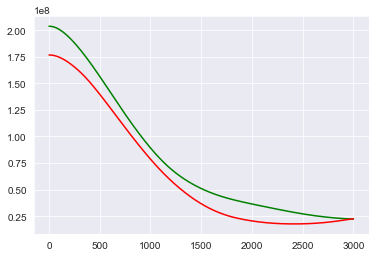

In [38]:
net_simple_single_mse_x = np.arange(len(net_simple_single_mse_test))
plt.plot(net_simple_single_mse_x, net_simple_single_mse_train, color='green')
plt.plot(net_simple_single_mse_x, net_simple_single_mse_test, color='red')
plt.show()

- ошибка высока
- остановить обучение надо было бы около 23000 epochs

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Супер, что построил график лосса, но лучше еще рядом построить график, то как наша метрика растет/падает/изменяется

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Если воспользуешься Dataset и Dataloader, то будешь героем!!! Огромный плюс, в том, что тебе не придется самому делать батчи + удобно очень использовать и выгружать данные (на больших проектах очень выручают, поэтому будет круто если разберешься, там нет ничего сложного, если что могу помочь, если не получится) P.S если что, не обращай внимание на collate_fn
                
+  https://towardsdatascience.com/how-to-use-datasets-and-dataloader-in-pytorch-for-custom-text-data-270eed7f7c00
    
    
P.S В самом конце проекта оставил код с Dataset и Dataloader это на случай если не получится или запутаешься:) Попробуй разобраться самостоятельно
    

Да, ты прав, у нас происходит переобучение и нужно вовремя остановиться. Для этого воспользуемся EarlyStopping, благодаря ему можно не подбирать кол-во эпох
                
+  https://debuggercafe.com/using-learning-rate-scheduler-and-early-stopping-with-pytorch/
</div>

In [40]:
#КОД РЕВЬЮЕРА
class CustomEarlyStopping():
    """
    Ранняя остановка, чтобы остановить тренировку, когда потеря не улучшается после определенной эпохи.
    """
    def __init__(self, patience=5, min_delta=100):
        """
        :param patience: сколько эпох ждать, прежде чем остановиться, когда потеря не улучшается
        :param min_delta: минимальная разница между loss/метриками, если улучшений нет, то остановим обучение
        """
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            # reset counter if validation loss improves
            self.counter = 0
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            print(f"INFO: Early stopping counter {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                print('INFO: Early stopping', f'delta={self.best_loss - val_loss}')
                self.early_stop = True

In [41]:
%%time
#КОД РЕВЬЮЕРА
test_rmse = list(range(10000, 5000, -500)) + list(range(1000, 6000, 100))

early_stopping = CustomEarlyStopping(patience=2, min_delta=10) #эти параметры можно подбирать

for i in test_rmse:
    print("RMSE: ", i)
    early_stopping(i)
    if early_stopping.early_stop:
        break

RMSE:  10000
RMSE:  9500
RMSE:  9000
RMSE:  8500
RMSE:  8000
RMSE:  7500
RMSE:  7000
RMSE:  6500
RMSE:  6000
RMSE:  5500
RMSE:  1000
RMSE:  1100
INFO: Early stopping counter 1 of 2
RMSE:  1200
INFO: Early stopping counter 2 of 2
INFO: Early stopping delta=-200
CPU times: user 0 ns, sys: 2.21 ms, total: 2.21 ms
Wall time: 1.33 ms


In [39]:
net_simple_setup = []
n_hidden_layers = 5
for i in range(n_hidden_layers):
    net_simple_setup.append(nn.Linear(15, 15))
net_simple_setup.append(nn.Linear(15, 1)) # layer out

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Идея хорошая, но, лучше будет если будешь менять кол-во нейронов. Можно кстати это делать рандомно 
    
P.S Baseline подразумевает, что мы прогоним созданную нейросеть и посмотрим, что же получится. Без какого либо подбора параметро и чего либо еще. Baseline нужен как скелет, то от чего потом можно будет отталкиваться:)  А улучшения/подбор/какого либо рода модификация уже в следующем разделе
</div>

In [40]:
net_simple_five = nn.Sequential(*net_simple_setup)
n_epochs = 1000
optimizer = torch.optim.Adam(net_simple_five.parameters(), lr=learning_rate)
loss = nn.MSELoss()

In [41]:
net_simple_five_mse_train = []
net_simple_five_mse_test = []

In [42]:
for epoch in range(n_epochs):
    optimizer.zero_grad()
    z_train_t = net_simple_five.forward(X_train_t).flatten()
    mse_value_train = loss(z_train_t, y_train_t)
    mse_value_train.backward()
    optimizer.step()

    if epoch % 10 == 0 or epoch == n_epochs - 1:
        net_simple_five.eval()
        z_test_t = net_simple_five.forward(X_test_t).flatten()
        mse_value_test = loss(z_test_t, y_test_t)
        mse_value_test.backward()

        net_simple_five_mse_train.append(mse_value_train.item())
        net_simple_five_mse_test.append(mse_value_test.item())

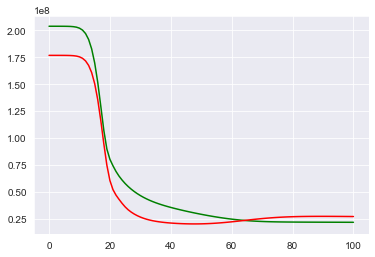

In [43]:
net_simple_five_mse_x = np.arange(len(net_simple_five_mse_test))
plt.plot(net_simple_five_mse_x, net_simple_five_mse_train, color='green')
plt.plot(net_simple_five_mse_x, net_simple_five_mse_test, color='red')
plt.show()

- ошибка не улучшилась, но благодаря слоям модель обучается быстрее

In [44]:
net_swish_setup = []
n_hidden_layers = 20
for i in range(n_hidden_layers):
    net_swish_setup.append(nn.Linear(15, 15))
    net_swish_setup.append(nn.Hardswish())
net_swish_setup.append(nn.Linear(15, 1)) # layer out

In [45]:
net_swish = nn.Sequential(*net_swish_setup)
n_epochs = 1000
optimizer = torch.optim.Adam(net_swish.parameters(), lr=learning_rate)
loss = nn.MSELoss()

In [46]:
net_swish_mse_train = []
net_swish_mse_test = []

In [47]:
for epoch in range(n_epochs):
    optimizer.zero_grad()
    z_train_t = net_swish.forward(X_train_t).flatten()
    mse_value_train = loss(z_train_t, y_train_t)
    mse_value_train.backward()
    optimizer.step()

    if epoch % 5 == 0 or epoch == n_epochs - 1:
        net_swish.eval()
        z_test_t = net_swish.forward(X_test_t).flatten()
        mse_value_test = loss(z_test_t, y_test_t)

        net_swish_mse_train.append(mse_value_train.item())
        net_swish_mse_test.append(mse_value_test.item())

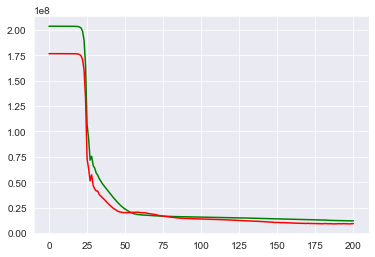

In [48]:
net_swish_mse_x = np.arange(len(net_swish_mse_train))
plt.plot(net_swish_mse_x, net_swish_mse_train, color='green')
plt.plot(net_swish_mse_x, net_swish_mse_test, color='red')
plt.show()

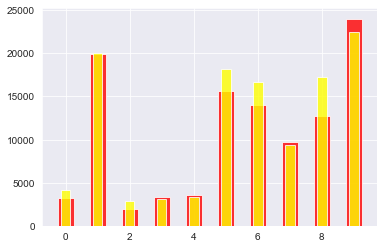

In [49]:
x = np.arange(10)
plt.bar(x, y_test_t.detach().numpy()[:10], width=0.5, alpha=0.8, color='red')
plt.bar(x, z_test_t.detach().numpy()[:10], width=0.3, alpha=0.8, color='yellow')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b> Хорошо
</div>

# Улучшение сети

- Dropout
- Batch Normalization

In [50]:
net_b_norm_setup = []
n_hidden_layers = 20
for i in range(n_hidden_layers):
    net_b_norm_setup.append(nn.Linear(15, 15))
    net_b_norm_setup.append(nn.BatchNorm1d(15))
    net_b_norm_setup.append(nn.Hardswish())
net_b_norm_setup.append(nn.Linear(15, 1)) # layer out

In [51]:
net_b_norm = nn.Sequential(*net_b_norm_setup)
n_epochs = 1200
optimizer = torch.optim.Adam(net_b_norm.parameters(), lr=learning_rate)
loss = nn.MSELoss()

In [52]:
net_b_norm_mse_train = []
net_b_norm_mse_test = []

In [53]:
for epoch in range(n_epochs):
    optimizer.zero_grad()
    z_train_t = net_b_norm.forward(X_train_t).flatten()
    mse_value_train = loss(z_train_t, y_train_t)
    mse_value_train.backward()
    optimizer.step()

    rmse = torch.sqrt(torch.sum(torch.pow(y_test_t - z_test_t, 2))).item()
    if rmse <= 4500:
        print(rmse)
        break

    if epoch % 5 == 0 or epoch == n_epochs - 1:
        net_b_norm.eval()
        z_test_t = net_b_norm.forward(X_test_t).flatten()
        mse_value_test = loss(z_test_t, y_test_t)

        net_b_norm_mse_train.append(mse_value_train.item())
        net_b_norm_mse_test.append(mse_value_test.item())

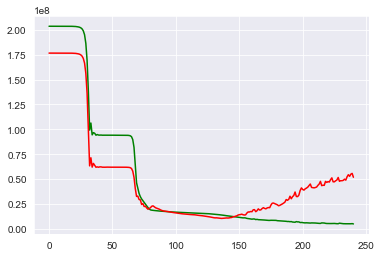

In [54]:
net_b_norm_mse_x = np.arange(len(net_b_norm_mse_train))
plt.plot(net_b_norm_mse_x, net_b_norm_mse_train, color='green')
plt.plot(net_b_norm_mse_x, net_b_norm_mse_test, color='red')
plt.show()

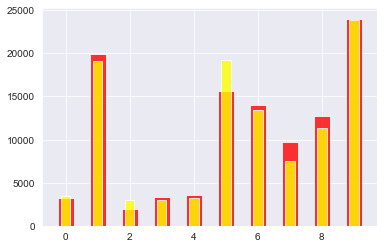

In [55]:
x = np.arange(10)
plt.bar(x, y_test_t.detach().numpy()[:10], width=0.5, alpha=0.8, color='red')
plt.bar(x, z_test_t.detach().numpy()[:10], width=0.3, alpha=0.8, color='yellow')
plt.show()

In [56]:
net_drop_setup = []
n_hidden_layers = 20
for i in range(n_hidden_layers):
    net_drop_setup.append(nn.Linear(15, 15))
    net_drop_setup.append(nn.Dropout(p=0.5))
    net_drop_setup.append(nn.Hardswish())
net_drop_setup.append(nn.Linear(15, 1)) # layer out

In [57]:
net_drop = nn.Sequential(*net_drop_setup)
n_epochs = 1400
optimizer = torch.optim.Adam(net_drop.parameters(), lr=learning_rate)
loss = nn.MSELoss()

In [58]:
net_drop_mse_train = []
net_drop_mse_test = []

In [59]:
for epoch in range(n_epochs):
    optimizer.zero_grad()
    z_train_t = net_drop.forward(X_train_t).flatten()
    mse_value_train = loss(z_train_t, y_train_t)
    mse_value_train.backward()
    optimizer.step()

    rmse = torch.sqrt(torch.sum(torch.pow(y_test_t - z_test_t, 2))).item()
    if rmse <= 4500:
        print(rmse)
        break

    if epoch % 5 == 0 or epoch == n_epochs - 1:
        net_drop.eval()
        z_test_t = net_drop.forward(X_test_t).flatten()
        mse_value_test = loss(z_test_t, y_test_t)

        net_drop_mse_train.append(mse_value_train.item())
        net_drop_mse_test.append(mse_value_test.item())

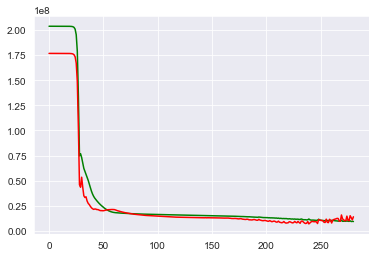

In [60]:
net_drop_mse_x = np.arange(len(net_drop_mse_train))
plt.plot(net_drop_mse_x, net_drop_mse_train, color='green')
plt.plot(net_drop_mse_x, net_drop_mse_test, color='red')
plt.show()

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Кстати, как отличается данный график от предыдущего? что изменилось?
</div>

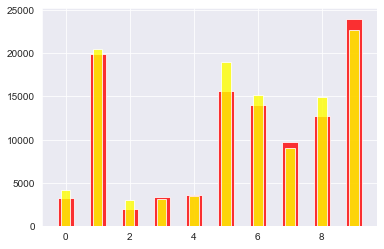

In [61]:
x = np.arange(10)
plt.bar(x, y_test_t.detach().numpy()[:10], width=0.5, alpha=0.8, color='red')
plt.bar(x, z_test_t.detach().numpy()[:10], width=0.3, alpha=0.8, color='yellow')
plt.show()

In [62]:
rmse = torch.sqrt(torch.sum(torch.pow(y_test_t - z_test_t, 2))).item()

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> У тебя формула тут получилась:

$RMSE = \sqrt { \sum_{i=1}^n (y_i - pred_i)^2}$
    
А какая формула RMSE на самом деле?
    
</div>

In [63]:
print(rmse)

18378.369140625


# Выводы

- У меня не получилось добиться результата, rmse 4500, мне нужен совет.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 
    
```python    
    from torch.utils.data import Dataset, DataLoader
    dataset_train = torch.utils.data.TensorDataset(x_train, y_train)
    dataset_test = torch.utils.data.TensorDataset(x_test, y_test)

    train_dataloader = DataLoader(dataset_train, batch_size=32, shuffle=True,
                                  num_workers=0)
    test_dataloader = DataLoader(dataset_test, batch_size=32, num_workers=0)               
```       
Пример обучения:
    
    
    
```python
   for epoch in range(num_epochs):
    net.train()
    for batch in train_dataloader:
        data_train, temperature_train = batch # просто выгружаем данные 
        optimizer.zero_grad()
        
        preds = net.forward(data_train).flatten()
               
        loss_value = torch.sqrt(loss(preds, temperature_train))
        loss_value.backward()
        optimizer.step()
        
    if epoch % 200 == 0:
        predicted_temp = [] 
        with torch.no_grad():
            net.eval()
            for batch in test_dataloader:
                data_test, temperature_test = batch # просто выгружаем данные
                
                test_preds = net.forward(data_test).flatten()
                predicted_temp.append(test_preds)
                RMSE_loss = torch.sqrt(loss(test_preds, temperature_test))
                
        predicted_temp = torch.cat(predicted_temp).detach().numpy()
        RMSE = mean_squared_error(y_test, predicted_temp, squared=False)
        early_stopping(RMSE)
        print(f"epoch:{epoch}, RMSE test: {RMSE}")
        
        if early_stopping.early_stop:
            print('Early Stoppning!!!')
            break 
    
    
```
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Немного полезного материала:    

1) Интересный контент вот здесь есть: https://neural-university.ru/ - институт нейросетей. <br>
2) Ребята из-за "бугра": https://www.reg.ru/blog/stenfordskij-kurs-lekciya-1-vvedenie/ (тут про свёрточные, но интересно)<br>
3) Интересная статья специалиста Тесла: https://karpathy.github.io/neuralnets/ <br>
4) Список книг на выбор: https://habr.com/ru/company/neurodatalab/blog/336218/ <br>



Кстати есть еще нейросеть TabNet, которая заточена для работы с табличными данными:
+  https://habr.com/ru/post/540736/    
+  https://www.kaggle.com/code/carlmcbrideellis/tabnet-a-very-simple-regression-example/notebook

</div>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>
<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Владислав, получился хороший проект! 
    
Если есть какие либо вопросы я с удовольствием на них отвечу:) <br> Исправь, пожалуйста, замечания и жду проект на следующую проверку:) </div>
